In [44]:
# IMPORT ALL NEEDED LIBRARIES
import pandas as pd
import seaborn as sns  # Importing the seaborn library for data visualization
import json  # Importing the json library for working with JSON data
import matplotlib.pyplot as plt  # [Warning] Duplicate import statement
from sklearn.feature_extraction.text import CountVectorizer  # Importing the CountVectorizer class from sklearn for text analysis
import nltk  # Importing the nltk library for natural language processing tasks
from nltk.corpus import stopwords  # Importing the stopwords corpus from nltk for text analysis
from nltk.probability import FreqDist  # Importing the FreqDist class from nltk for frequency distribution analysis
from nltk.sentiment import SentimentIntensityAnalyzer  # Importing the SentimentIntensityAnalyzer class from nltk for sentiment analysis
from nltk.tokenize import word_tokenize  # Importing the word_tokenize function from nltk for tokenizing text
import warnings  # Importing the warnings module for handling warnings
warnings.filterwarnings('ignore')  # Ignoring warning messages during execution
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from scipy.stats import spearmanr

In [61]:

# Specifying the path to the users.csv file
dataPath = 'dataset.csv'
# Reload the dataset using semicolon as the delimiter
df = pd.read_csv(dataPath, delimiter=';')

# Styling the first 10 rows of the dfUsers dataframe for better visualization
styledHeadDf = df.head().style.set_properties(
    **{
        'border': '1.3px solid white',
        'color': 'white',
        'background-color': 'black',
        'font-size': '10px',
        'width':'20%',
    }
)
styledHeadDf

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,vat,total,dtme,tme,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,2019-01-05 00:00:00,13:08:00,Ewallet,522.830000,4.761900,26.141500,9.100000,afternoon,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,2019-03-08 00:00:00,10:29:00,Cash,76.400000,4.761900,3.820000,9.600000,morning,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,2019-03-03 00:00:00,13:23:00,Credit card,324.310000,4.761900,16.215500,7.400000,afternoon,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,2019-01-27 00:00:00,20:33:00,Ewallet,465.760000,4.761900,23.288000,8.400000,evening,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2019-02-08 00:00:00,10:37:00,Ewallet,604.170000,4.761900,30.208500,5.300000,morning,Friday,February


In [46]:
# Using pandas' 'tail()' function, we show the dataset's final 10 rows for a cursory analysis.
# This aids in giving a brief overview of the dataset, including with column names and values.
print("Last 10 rows of users.csv using tail():")

# Styling the last 10 rows of the dfUsers dataframe for better visualization
styledTailDf = df.tail().style.set_properties(
    **{
        'border': '1.3px solid black',
        'color': 'white',
        'background-color': 'grey',
        'font-size': '10px',
        'width':'20%',
    }
)
styledTailDf

Last 10 rows of users.csv using tail():


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,vat,total,dtme,tme,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.350000,1,2.017500,42.367500,2019-01-29 00:00:00,13:46:00,Ewallet,40.350000,4.761900,2.017500,6.200000,afternoon,Tuesday,January
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.380000,10,48.690000,1022.490000,2019-03-02 00:00:00,17:16:00,Ewallet,973.800000,4.761900,48.690000,4.400000,evening,Saturday,March
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.840000,1,1.592000,33.432000,2019-02-09 00:00:00,13:22:00,Cash,31.840000,4.761900,1.592000,7.700000,afternoon,Saturday,February
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.820000,1,3.291000,69.111000,2019-02-22 00:00:00,15:33:00,Cash,65.820000,4.761900,3.291000,4.100000,afternoon,Friday,February
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.340000,7,30.919000,649.299000,2019-02-18 00:00:00,13:28:00,Cash,618.380000,4.761900,30.919000,6.600000,afternoon,Monday,February


In [47]:
# Printing the number of rows and columns in the users.csv dataset
print(f"\nThe csv dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n")


The csv dataset has 1000 rows and 20 columns.



In [48]:
# Printing dataset information
print("Dataset Info:\n")
# Printing the information about the dfUsers dataframe using the info() function
print(df.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   invoice_id        1000 non-null   object 
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_line      1000 non-null   object 
 6   unit_price        1000 non-null   float64
 7   quantity          1000 non-null   int64  
 8   vat               1000 non-null   float64
 9   total             1000 non-null   float64
 10  dtme              1000 non-null   object 
 11  tme               1000 non-null   object 
 12  payment_method    1000 non-null   object 
 13  cogs              1000 non-null   float64
 14  gross_margin_pct  1000 non-null   float64
 15  gross_income      1000 non-null   float64
 16  rating            1000 non-n

In [49]:
# Printing descriptive statistics for the users.csv dataset
print("\nDescriptive Statistics for users.csv:")

# Calculating the descriptive statistics for the df dataframe using the describe() function
statsDescription = df.describe().style.set_properties(
    **{
        'border': '1.3px solid white',
        'color': 'white',
        'background-color': 'grey',
        'font-size': '10px',
        'width':'20%',
    }
)

# Outputting the styled descriptive statistics dataframe
statsDescription


Descriptive Statistics for users.csv:


,unit_price,quantity,vat,total,cogs,gross_margin_pct,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.587380,4.761900,15.379369,6.972700
std,26.494628,2.923431,11.708825,245.885335,234.176510,0.000000,11.708825,1.718580
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761900,0.508500,4.000000
25%,32.875000,3.000000,5.924875,124.422375,118.497500,4.761900,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.848000,241.760000,4.761900,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.905000,4.761900,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761900,49.650000,10.000000


In [50]:
# The number of missing (null) values in each column of the dataset is determined and shown by this code block.
# The 'isnull()' function in pandas is used to find nulls in the DataFrame, and then'sum()' is used to aggregate the nulls column-wise.
# To find and properly manage missing data, this check is essential throughout the preprocessing stage of data.
print("Null Values in each column:")
print(df.isnull().sum())

Null Values in each column:
invoice_id          0
branch              0
city                0
customer_type       0
gender              0
product_line        0
unit_price          0
quantity            0
vat                 0
total               0
dtme                0
tme                 0
payment_method      0
cogs                0
gross_margin_pct    0
gross_income        0
rating              0
time_of_day         0
day_name            0
month_name          0
dtype: int64


In [51]:
# Display the number of unique values in each column, handling unhashable types
# In the code block below an iteration through each columns of every dataset is done using pandas' 
# 'nunique()' to count unique values. A try-except block handles  unhashable types like lists or dictionaries,
#  outputting a custom message in such cases.  This helps in assessing data variability and identifying potential categorical columns.
  
print("Number of unique values in each column:")
for col in df.columns:
    try:
        print(f"{col}: {df[col].nunique()}")
    except TypeError:
        print(f"{col}: Unhashable type")


Number of unique values in each column:
invoice_id: 1000
branch: 3
city: 3
customer_type: 2
gender: 2
product_line: 6
unit_price: 943
quantity: 10
vat: 990
total: 990
dtme: 89
tme: 506
payment_method: 3
cogs: 990
gross_margin_pct: 1
gross_income: 990
rating: 61
time_of_day: 3
day_name: 7
month_name: 3


In [52]:
# Identify categorical and non-categorical columns.
# The purpose of this code below  is to divide the dataset's columns into categories and non-categorical data types. Using pandas''select_dtypes' function, it first attempts to locate categorical columns (those with data types of 'object' or 'category'). List comprehension is used to manually identify 'object' type columns as categorical in the event that a TypeError is raised (due to unhashable types in columns). Next, the 'object' and 'category' data types are excluded in order to identify the non-categorical columns.
# The function ends  by printing lists of both category and non-categorical columns. This gives a clear picture of the structure of the dataset, which is crucial for further data analysis procedures.
try:
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
except TypeError:
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
non_categorical_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)
print("\nNon-Categorical Columns:")
print(non_categorical_cols)

Categorical Columns:
['invoice_id', 'branch', 'city', 'customer_type', 'gender', 'product_line', 'dtme', 'tme', 'payment_method', 'time_of_day', 'day_name', 'month_name']

Non-Categorical Columns:
['unit_price', 'quantity', 'vat', 'total', 'cogs', 'gross_margin_pct', 'gross_income', 'rating']


Data Visualization for Sample Dataset
--------------------------------------------------


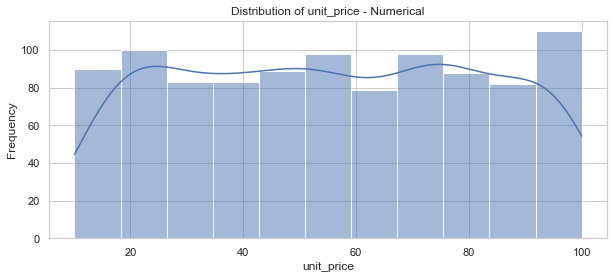

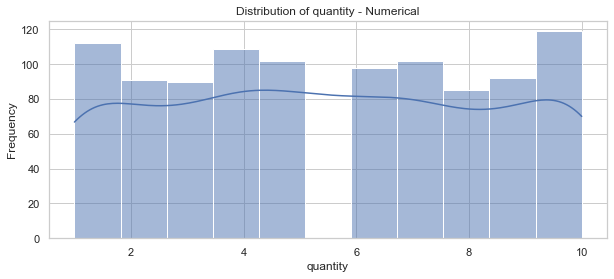

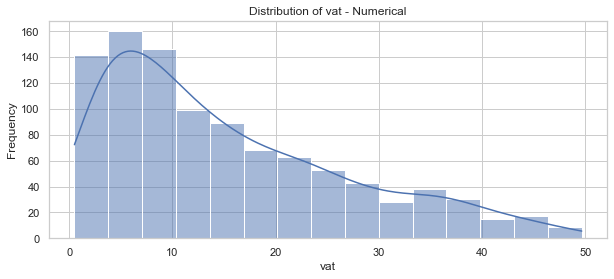

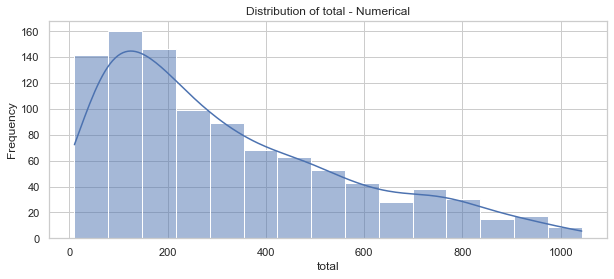

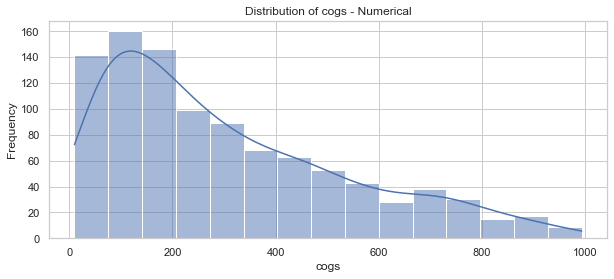

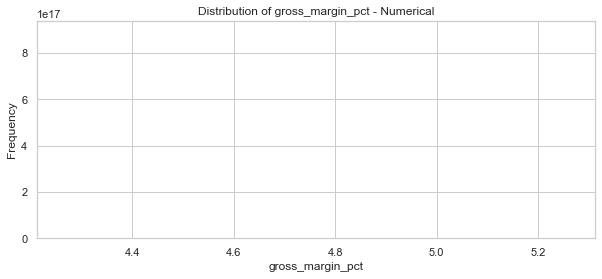

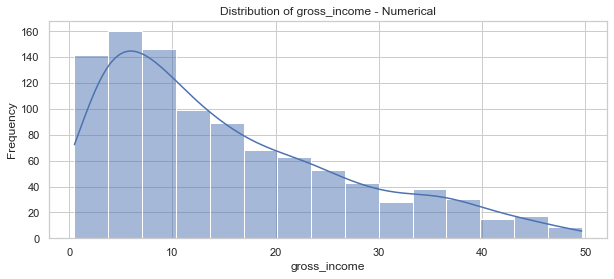

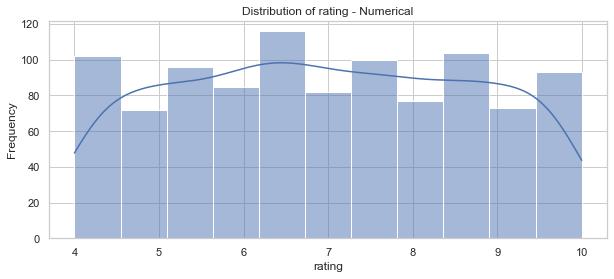

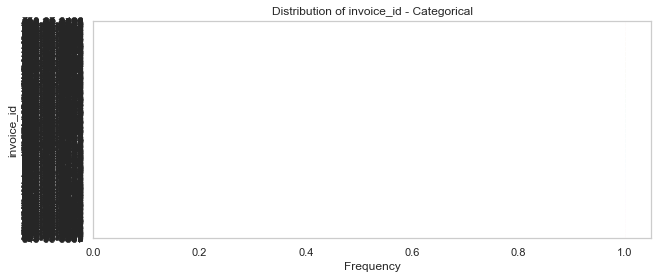

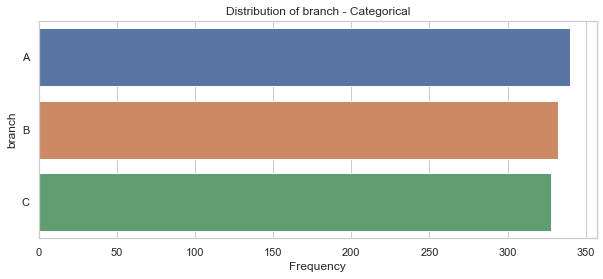

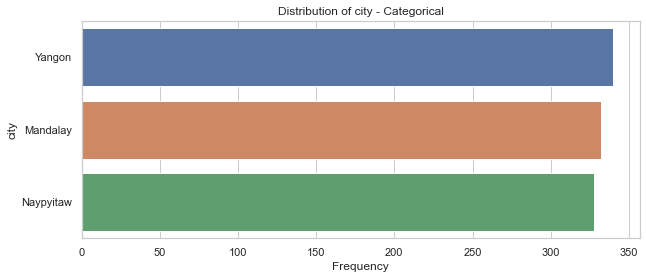

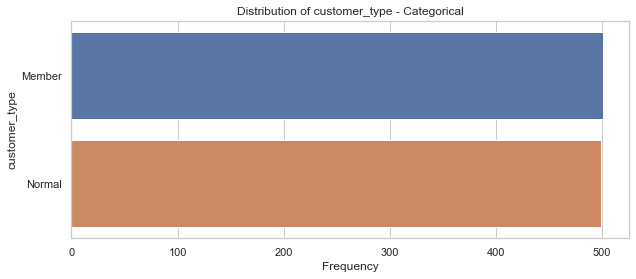

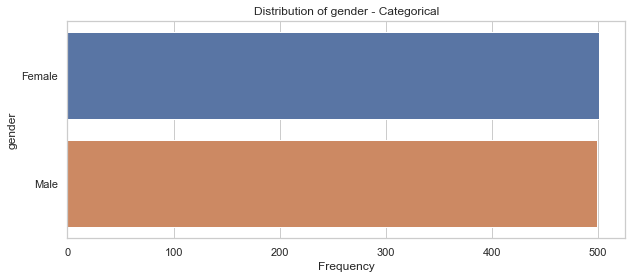

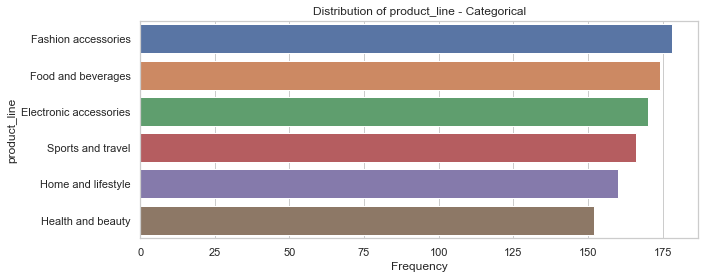

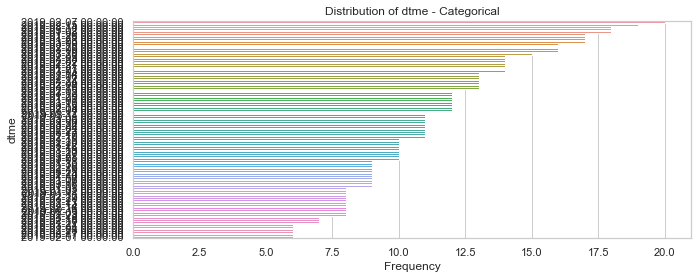

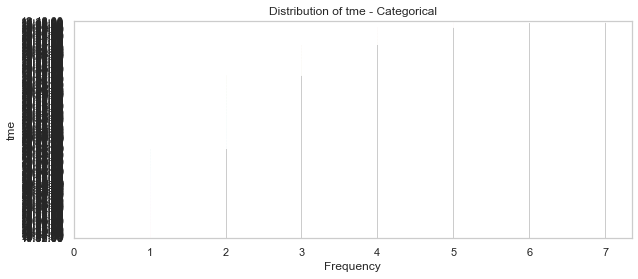

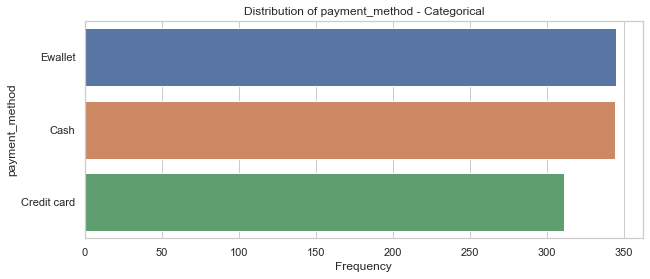

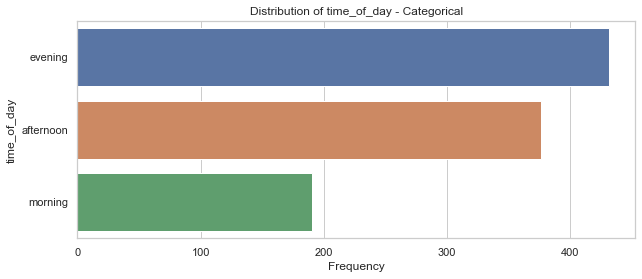

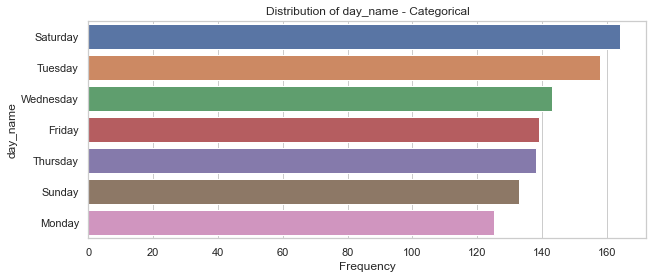

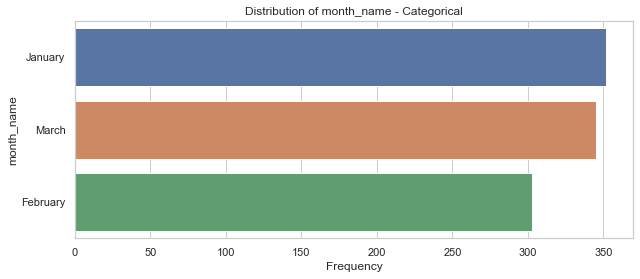

In [53]:
def visualize_data(df, ds_name):
    # Setting the aesthetics for the plots
    sns.set(style="whitegrid")

    # Print title for the data visualization
    print(f"Data Visualization for {ds_name} Dataset\n{'-'*50}")

    # Identify categorical and numerical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Plotting distributions for numerical variables
    for col in numerical_columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col} - Numerical")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Plotting distributions for categorical variables
    for col in categorical_columns:
        plt.figure(figsize=(10, 4))
        sns.countplot(y=col, data=df, order = df[col].value_counts().index)
        plt.title(f"Distribution of {col} - Categorical")
        plt.xlabel('Frequency')
        plt.ylabel(col)
        plt.show()

# Call the function with the loaded dataframe
visualize_data(df, "Sample")


Inferential Analysis

In [54]:
# 1. Customer Behavior Analysis
# a. Relationship Between Customer Demographics and Payment Methods
# Count of payment methods by gender and customer type
payment_method_counts = df.groupby(['gender', 'customer_type'])['payment_method'].value_counts().unstack().fillna(0)
print(payment_method_counts)

# Chi-square test to see if there's a significant relationship between categorical variables
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(payment_method_counts)
print(f"Chi-square test results: chi2={chi2}, p-value={p}")

payment_method        Cash  Credit card  Ewallet
gender customer_type                            
Female Member           90           90       81
       Normal           88           73       79
Male   Member           78           82       80
       Normal           88           66      105
Chi-square test results: chi2=8.891212648266624, p-value=0.17978926735472428


In [55]:
# b. Correlation Between Product Line Popularity and Customer Ratings
# Average rating by product line
product_line_ratings = df.groupby('product_line')['rating'].mean()
# Sales count by product line
product_line_sales = df.groupby('product_line')['quantity'].sum()

# Correlation calculation
correlation = product_line_ratings.corr(product_line_sales)
print(f"Correlation between product line popularity and customer ratings: {correlation}")

Correlation between product line popularity and customer ratings: 0.010495648277949469


Predictive Analysis

In [56]:
# Predictive Analysis
# 1. Sales Forecasting (Outline)
# For sales forecasting, you can use ARIMA or seasonal decomposition. This requires time series data preparation and fitting the model accordingly.
# Example outline for ARIMA (requires statsmodels library)
from statsmodels.tsa.arima.model import ARIMA

# Assuming `df['date']` is your time column and you're analyzing total sales
# Convert date column to datetime
df['date'] = pd.to_datetime(df['dtme'])
df.set_index('date', inplace=True)
monthly_sales = df.resample('M')['total'].sum()

# Fit ARIMA model
model = ARIMA(monthly_sales, order=(1, 1, 1))  # Example order, adjust based on ACF/PACF plots
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)

In [57]:
# 2. Customer Segmentation (Outline)
# For customer segmentation using K-means:
# Example features for clustering
features = df[['unit_price', 'quantity', 'total']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(features_scaled)
df['cluster'] = kmeans.labels_

Prescriptive Analysis


In [58]:
# Marketing and Promotion Strategies
# Based on customer segmentation:
segment_analysis = df.groupby('cluster').agg({
    'total': 'mean',
    'rating': 'mean',
    # Add more aggregations as needed
})

print(segment_analysis)


              total    rating
cluster                      
0        152.758604  6.981282
1        231.133976  7.036859
2        641.869440  6.894295


In [59]:
# Inferential Analysis
# Analyzing Customer Behavior
# Advanced Customer Demographics 
# and Payment Methods Analysis:
# Beyond the chi-square test, you can use logistic regression 
# to model the likelihood of choosing a specific payment method based on 
# customer demographics. This allows you to quantify the impact of being a member or 
# of a certain gender on the choice of payment method.
# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df[['payment_method', 'gender', 'customer_type']], drop_first=True)

# Logistic regression model
X = df_dummies[['gender_Male', 'customer_type_Normal']]  # Predictor variables
y = df_dummies['payment_method_Credit card']  # Target variable

X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 142.463594
         Iterations 5
                               Logit Regression Results                               
Dep. Variable:     payment_method_Credit card   No. Observations:                 1000
Model:                                  Logit   Df Residuals:                      997
Method:                                   MLE   Df Model:                            2
Date:                        Fri, 23 Feb 2024   Pseudo R-squ.:                     inf
Time:                                02:37:33   Log-Likelihood:            -1.4246e+05
converged:                               True   LL-Null:                        0.0000
Covariance Type:                    nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

Detailed Product Line Analysis: To further understand the correlation between product popularity and customer ratings, consider using Spearman's rank correlation instead of Pearson's, especially if the data is not normally distributed or if the relationship is not linear. Spearman's correlation assesses how well the relationship between two variables can be described using a monotonic function.

In [60]:
# Calculate Spearman's correlation
corr, _ = spearmanr(product_line_ratings, product_line_sales)
print(f"Spearman's correlation: {corr}")


Spearman's correlation: -0.028571428571428574
